In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sn

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv("C:/Users/ayan1/OneDrive/Documents/Course/Machine Learning Using Python/Data Folder/Dummy Data HSS__1_.csv",header = 0)
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [5]:
data['TV']=data['TV'].fillna(data['TV'].mean())
data['Radio']=data['Radio'].fillna(data['Radio'].mean())
data['Social Media']=data['Social Media'].fillna(data['Social Media'].mean())
data['Sales']=data['Sales'].fillna(data['Sales'].mean())

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4572 non-null   float64
 1   Radio         4572 non-null   float64
 2   Social Media  4572 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4572 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [8]:
data = pd.get_dummies(data)

In [9]:
del data['Influencer_Nano']

In [23]:
x1 = sn.add_constant(data['TV'])
y1 = data['Sales']

In [26]:
lm_1 =  sn.OLS(y1,x1).fit()

In [20]:
x2 = data[['TV']]
y2 = data['Sales']

lm_2 = LinearRegression()

In [21]:
lm_2.fit(x2, y2)

LinearRegression()

In [27]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 6.792e+05
Date:                Tue, 06 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:00:06   Log-Likelihood:                -15765.
No. Observations:                4572   AIC:                         3.153e+04
Df Residuals:                    4570   BIC:                         3.155e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2849      0.259      1.100      0.271      -0.223       0.793
TV             3.5545      0.004    824.111      0.000       3.546       3.563
==============================================================================
Omnibus:                     2844.142   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12214106.398
Skew:                           1.223   Prob(JB):                         0.00
Kurtosis:                     256.200   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
print(lm_2.intercept_,'\n',lm_2.coef_[0])

0.2849025970087098 
 3.554519560527744


In [44]:
x_m = data.drop(['Sales'],axis=1)
x_m = x_m.astype(float)
x_m_c = sn.add_constant(x_m)
x_m_c = x_m_c.astype(float)

y_m = data['Sales']
y_m = y_m.astype(float)

In [45]:
lm_m1 = sn.OLS(y_m,x_m).fit()
lm_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          6.046e+05
Date:                Tue, 06 Aug 2024   Prob (F-statistic):                        0.00
Time:                        14:12:29   Log-Likelihood:                         -15748.
No. Observations:                4572   AIC:                                  3.151e+04
Df Residuals:                    4566   BIC:                                  3.155e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
TV                   3.5144      0.008    428.469      0.000       3.498       3.530
Radio                0.1225      0.025      4.924      0.000       0.074       0.171
Social Media         0.0619      0.063      0.980      0.327      -0.062       0.186
Influencer_Macro    -0.2849      0.281     -1.013      0.311      -0.836       0.267
Influencer_Mega      0.1505      0.276      0.545      0.586      -0.391       0.692
Influencer_Micro     0.1298      0.277      0.469      0.639      -0.412       0.672
==============================================================================
Omnibus:                     2771.256   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11696700.333
Skew:                           1.143   Prob(JB):                         0.00
Kurtosis:                     250.780   Cond. No.                         205.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
lm_m2 = LinearRegression()

In [47]:
lm_m2.fit(x_m, y_m)

LinearRegression()

In [48]:
print(lm_m2.intercept_,'\n',lm_m2.coef_)

0.1982268538905032 
 [ 3.512761    0.12263889  0.05599117 -0.37621142  0.05679199  0.03605299]


In [50]:
x_train,x_test,y_train,y_test = train_test_split(x_m,y_m,train_size=.8,random_state=1)

In [51]:
lm_X = LinearRegression()
lm_X.fit(x_train,y_train)

LinearRegression()

In [54]:
test_y_prediction = lm_X.predict(x_test)
train_y_prediction = lm_X.predict(x_train)

In [52]:
r2_score(y_test,lm_X.predict(x_test))

0.9904896678779612

In [53]:
r2_score(y_train,lm_X.predict(x_train))

0.9940980152796026

In [55]:
from sklearn.linear_model import Ridge

lm_ridge = Ridge(alpha=0.6)

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)

In [57]:
x_train_standard = scaler.transform(x_train)
x_test_standard = scaler.transform(x_test)

In [59]:
lm_ridge.fit(x_train_standard,y_train)

Ridge(alpha=0.6)

In [60]:
r2_score(y_test,lm_ridge.predict(x_test_standard))

0.9904909915807704

In [64]:
from sklearn.model_selection import validation_curve

# help(validation_curve)

In [66]:
param_range = np.logspace(-2,8,100)

In [72]:
train_scores,test_scores = validation_curve(estimator = Ridge(), X=x_train_standard,y=y_train,param_name='alpha',param_range=param_range,scoring='r2')

In [73]:
train_mean = train_scores.mean()
test_mean = test_scores.mean()

In [78]:
max_test_mean = test_mean.max()

In [79]:
max_test_mean

0.6076440551820412

c:\Users\ayan1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ayan1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


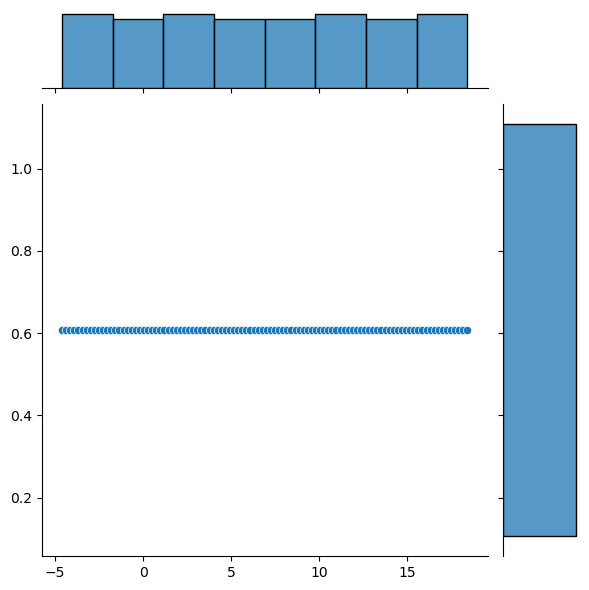

In [81]:
sns.jointplot(x=np.log(param_range),y=test_mean)